In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import red_tables.utils.paths as path
import os
import red_tables.utils.funtions as funtions

2024-12-03 20:38:24.065011: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-03 20:38:24.093926: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-03 20:38:24.093977: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-03 20:38:24.094738: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-03 20:38:24.099994: I tensorflow/core/platform/cpu_feature_guar

Creando dataset tensorflow

In [4]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [5]:
train_dir = path.data_processed_dir('train')
test_dir = path.data_processed_dir('test')
val_dir = path.data_processed_dir('validation')

In [6]:
print(len(os.listdir(path.data_processed_dir('train','1X1')))*9)
print(len(os.listdir(path.data_processed_dir('test','1X1')))*9)
print(len(os.listdir(path.data_processed_dir('validation','1X1')))*9)

1440
180
180


In [7]:
epoch_steps = 1440 // 32
test_steps = 180 // 32

In [8]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

In [9]:
ih, iw = 224, 224 #tamano de la imagen
train_datagen = ImageDataGenerator(rotation_range=1,
                                   rescale=1./255,
                                   horizontal_flip=True)

train = train_datagen.flow_from_directory(train_dir,
                batch_size=32,
                target_size=(iw, ih),
                class_mode='categorical',
                color_mode='rgb'
                                     )

gentest = ImageDataGenerator(rescale=1./255)

test = gentest.flow_from_directory(test_dir,
                batch_size=32,
                target_size=(iw, ih),
                class_mode='categorical',
                color_mode='rgb'
                )
genval = ImageDataGenerator(rescale=1./255)

val = genval.flow_from_directory(val_dir,
                batch_size=32,
                target_size=(iw, ih),
                class_mode='categorical',
                color_mode='rgb'
                )

Found 1440 images belonging to 9 classes.
Found 180 images belonging to 9 classes.
Found 180 images belonging to 9 classes.


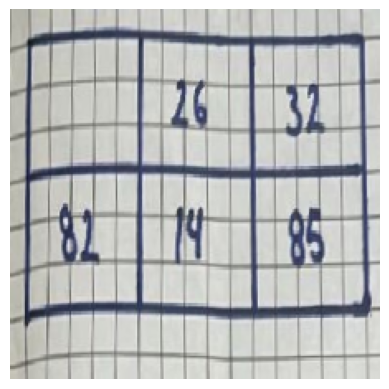

In [13]:
for i,j in train:
    plt.imshow(i[2],cmap='gray')
    plt.axis('Off')
    #plt.savefig('tabla.jpg')
    plt.show()
    break